Сначала разберемся с координатами

(240, 240, 155)


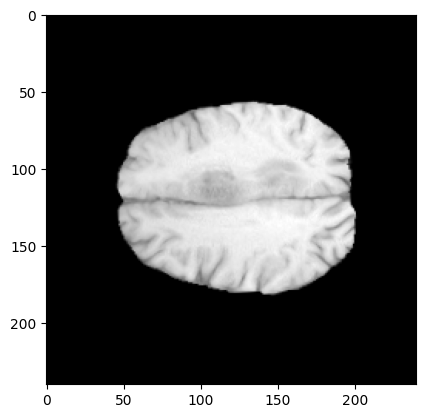

In [50]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

path = r'F:\!наука\stroke\Brain Tumor\MICCAI_BraTS_2019_Data_Training\HGG\BraTS19_2013_2_1'
img = nib.load(f'{path}\BraTS19_2013_2_1_t1.nii')
img_data = img.get_fdata()
plt.imshow(img_data[:, :, 100], cmap='gray')
print(img.shape)
#последняя координата - это координата по z (низ-верх)

Эта информация хранится в другом фрагменте метаданных в заголовке файла, который называется **«аффинной матрицей»**. Это матрица 4х4, содержащая информацию, сообщающую нам, как объем сбора данных был расположен относительно прибора МРТ и относительно мозга субъекта, который находится внутри магнита. *Аффинная матрица, хранящаяся вместе с данными, позволяет однозначно обозначить расположение объема данных относительно сканера*.

### Подробнее о координатах
когда мы проводим измерения с помощью приборов МРТ, мы определяем систему координат сканера как систему координат, начало координат которой лежит в изоцентре сканера. 
Объект помещается на кровать лицом вверх.
Мы можем определить первую ось (x) как ту, которая проходит слева направо через мозг субъекта, когда он лежит внутри отверстия МРТ, а вторая ось (y) определяется как идущая от пола камеры.
Последняя ось (z) проходит от их ног, лежащих вне магнита, через макушку головы (это «нижний-верхний»). Опираясь на эти оси, мы говорим, что данная система координат имеет ориентацию «RAS» (правая, передняя, ​​верхняя). Это означает, что координаты увеличиваются к правой стороне субъекта, к передней части его мозга и к верхней части его головы.

В пространственной системе координат магнита МРТ.

 Как мы говорили выше, начало пространства сканера находится в изоцентре магнита. Но данные МРТ обычно берут свое начало где-то за пределами головы субъекта, так что они охватывают весь мозг. Итак, нам необходимо переместить начало пространства из изоцентра в базис сканируемого объема. Математически это означает сдвиг каждой координаты в пространстве сканера на $ [\Delta x,
\Delta у,
\Delta z]$, где каждый из этих компонентов описывает, где находится базис МРТ относительно положения изоцентра.

К сожалению, это не та операция, которую мы можем выполнить, умножив координаты на матрицу 3х3. 

Вместо этого нам нужно будет использовать математический трюк: мы добавим к координатам размерность, чтобы они были записаны как $[x, y, z, 1]$. Это из-за того, что аффинная матрица выглядит так 4х4:

$ aff = 
 \begin{bmatrix}  &  &  & \Delta x \\  & A_{total} &  & \Delta y\\ &  &  & \Delta y \\ 0 & 0 & 0 & 1 \end{bmatrix}$

где $A_{total}$ 
— это матрица, состоящая из наших вращений и масштабирований,

$aff$ - это и есть аффинная матрица, которую получаем .affine.

In [3]:
#Get the affine matrix and convert the coordinates.
aff = img.affine
print(aff @ np.array([0, 0, 0, 1]))
print(aff @ np.array([0, 0, 1, 1]))

[  0. 239.   0.   1.]
[  0. 239.   1.   1.]


Это говорит нам о том, что элемент, обозначенный как $[0, 0, 0]$, расположен на 0 мм левее изоцентра, на 239 мм вперед от изоцентра (в сторону потолка комнаты) и на 0 мм ниже изоцентра (в сторону той стороны комнаты, где находятся ноги испытуемого(торчат из МРТ)).

(256, 256, 25, 2)


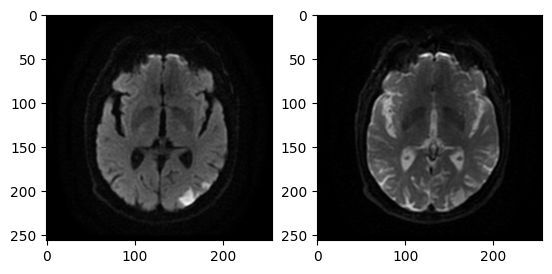

In [4]:
from nilearn import image
# посмотри на изображение из наших
img_ = nib.load(r'F:\!наука\stroke\Lesions\Lesions\Aterotromb\Balandin_VP\dwi.nii.gz')
print(img_.shape)
#у нас изображения 4-мерные, нужно от 4 измерения избавиться для построения графика
img_1 = image.index_img(img_, 0)
img_2 = image.index_img(img_, 1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_1.get_fdata()[:, :, 12], cmap='gray')
ax[1].imshow(img_2.get_fdata()[:, :, 12], cmap='gray')
plt.show()

In [5]:
aff2 = img_1.affine
print(aff2 @ np.array([0, 0, 0, 1]))
print(aff2 @ np.array([0, 0, 1, 1]))
print(aff2 @ np.array([0, 0, 12, 1]))
print(aff2 @ np.array([0, 0, 24, 1]))

[-126.1325531   142.09039307  -30.05366135    1.        ]
[-126.24796677  140.78500259  -24.19863653    1.        ]
[-127.51751718  126.42570734   40.20663643    1.        ]
[-128.90248126  110.76102161  110.4669342     1.        ]


Не всё так очевидно! Обратим внимание, что наши изображения ещё и оринтированны по-разному. И преобразование идёт тоже не так очевидно. Но 1 и 2 координаты явно меняются не так значительно, как координаты по 3 оси, очевидно, это и есть наша ось z.


(256, 256, 25, 2)


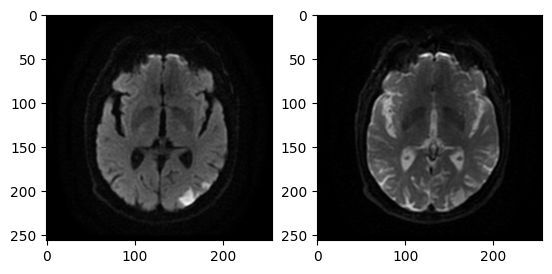

In [65]:
# посмотри на ещё одно изображение из наших
img__ = nib.load(r'F:\!наука\stroke\Lesions\Lesions\Aterotromb\Balandin_VP\dwi.nii.gz')
print(img_.shape)
#у нас изображения 4-мерные, нужно от 4 измерения избавиться для построения графика
img_21 = image.index_img(img_, 0)
img_22 = image.index_img(img_, 1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_21.get_fdata()[:, :, 12], cmap='gray')
ax[1].imshow(img_22.get_fdata()[:, :, 12], cmap='gray')
plt.show()

In [48]:
aff3 = img_21.affine
print(aff2 @ np.array([0, 0, 0, 1]))
print(aff3 @ np.array([0, 0, 0, 1]))
print(aff2 @ np.array([0, 0, 1, 1]))
print(aff3 @ np.array([0, 0, 1, 1]))
print(aff2 @ np.array([0, 0, 12, 1]))
print(aff3 @ np.array([0, 0, 12, 1]))
print(aff2 @ np.array([0, 0, 24, 1]))
print(aff3 @ np.array([0, 0, 24, 1]))

[-126.1325531   142.09039307  -30.05366135    1.        ]
[-126.1325531   142.09039307  -30.05366135    1.        ]
[-126.24796677  140.78500259  -24.19863653    1.        ]
[-126.24796677  140.78500259  -24.19863653    1.        ]
[-127.51751718  126.42570734   40.20663643    1.        ]
[-127.51751718  126.42570734   40.20663643    1.        ]
[-128.90248126  110.76102161  110.4669342     1.        ]
[-128.90248126  110.76102161  110.4669342     1.        ]


[-126.1325531   142.09039307  -30.05366135    1.        ]
[-126.24796677  140.78500259  -24.19863653    1.        ]
[-126.36338045  139.47961211  -18.34361172    1.        ]
[-126.47879412  138.17422163  -12.4885869     1.        ]
[-126.59420779  136.86883116   -6.63356209    1.        ]
[-126.70962147  135.56344068   -0.77853727    1.        ]
[-126.82503514  134.2580502     5.07648754    1.        ]
[-126.94044881  132.95265973   10.93151236    1.        ]
[-127.05586249  131.64726925   16.78653717    1.        ]
[-127.17127616  130.34187877   22.64156199    1.        ]
[-127.28668983  129.03648829   28.4965868     1.        ]
[-127.40210351  127.73109782   34.35161161    1.        ]
[-127.51751718  126.42570734   40.20663643    1.        ]
[-127.63293085  125.12031686   46.06166124    1.        ]
[-127.74834453  123.81492639   51.91668606    1.        ]
[-127.8637582   122.50953591   57.77171087    1.        ]
[-127.97917187  121.20414543   63.62673569    1.        ]
[-128.09458555

(-128.0, 128.0)

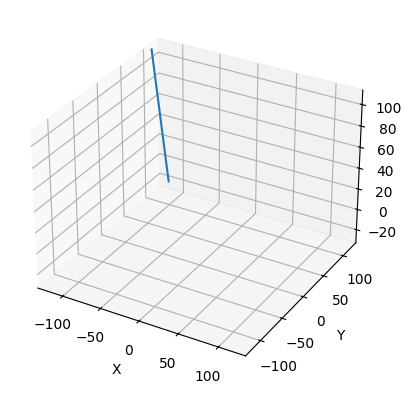

In [34]:
coords = np.empty(0)
for i in range(25):
    coords = np.append(coords, (aff2 @ np.array([0, 0, i, 1]))[:-1])
    print(aff2 @ np.array([0, 0, i, 1]))

coords = coords.reshape(-1, 3).T
fig = plt.figure()
plot_axis = plt.axes (projection = '3d')
plot_axis.plot3D (coords[0], coords[1], coords[2])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-128, 128)
plt.ylim(-128, 128)


### Вывод:

для регрессора попробуем использовать только наши сечения.

Видимо, у нас при сканировании происходило небольшое смещение изоцентра, относительно наших осей, человек лежал неидеально ровно?



In [42]:
a =img_21.get_fdata()[:, :, 12]
a.shape

(256, 256)

подготовим данные для регрессора

In [96]:
path = r'F:\!наука\stroke\Lesions\Lesions'
stroke_types = os.listdir(path)
X = []
Y = []
a = 0
for folder in stroke_types:
    for patient in os.listdir(f'{path}\{folder}'):
        img = nib.load(f'{path}\{folder}\{patient}\dwi.nii.gz')
        if len(img.shape) == 4:
            img = image.index_img(img, 0)
        else:
             a+= 1
        img_data = img.get_fdata()
        aff = img.affine
        for i in range(img.shape[2]):
            Y.append(round((aff @ np.array([0, 0, i, 1]))[2]))
            X.append(img_data[:, :, i])
            if Y[i] > 110 or Y[i] < -30:
                print(f'{path}\{folder}\{patient}', i, img.shape)
print(a)

F:\!наука\stroke\Lesions\Lesions\Aterotromb\Kalinin_VM 25 (256, 256, 49)
F:\!наука\stroke\Lesions\Lesions\Aterotromb\Kalinin_VM 26 (256, 256, 49)
F:\!наука\stroke\Lesions\Lesions\Aterotromb\Pankov_MA 25 (256, 256, 28)
F:\!наука\stroke\Lesions\Lesions\Aterotromb\Pankov_MA 26 (256, 256, 28)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Berezina 25 (256, 256, 28)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Berezina 26 (256, 256, 28)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Gryigin 25 (256, 256, 26)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Naidanova 25 (256, 256, 28)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Naidanova 26 (256, 256, 28)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Shabalina 25 (256, 256, 49)
F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Shabalina 26 (256, 256, 49)
F:\!наука\stroke\Lesions\Lesions\Crypto\Barkulov 25 (256, 256, 26)
F:\!наука\stroke\Lesions\Lesions\Crypto\Shnayder 25 (256, 256, 27)
F:\!наука\stroke\Lesions\Lesions\Crypto\Shnayder 26 (25

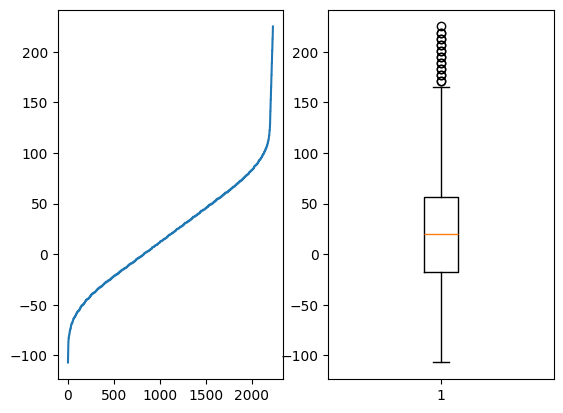

In [54]:
#какие-то выбросы по данным
fig, ax = plt.subplots(1, 2)
ax[0].plot(sorted(Y))
ax[1].boxplot(Y)
plt.show()

(256, 256, 28, 2)


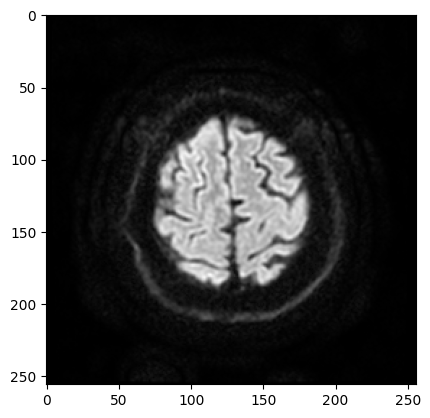

In [111]:
# посмотрим на эти снимки, в которых у нас больше слоёв
# есть 6 снимков, в которых чуть больше слоёв
img_spec = nib.load(r'F:\!наука\stroke\Lesions\Lesions\Aterotromb\Pankov_MA\dwi.nii.gz')
print(img_spec.shape)
img_spec = image.index_img(img_spec, 0)
plt.imshow(img_spec.get_fdata()[:, :, 22], cmap='gray')
plt.show()

In [98]:
aff_spec = img_spec.affine
print(aff_spec @ np.array([0, 0, 27, 1]))
print(img.affine @ np.array([0, 0, 25, 1]))

[-117.63863218   95.78341448   88.80809259    1.        ]
[-132.02063309   97.29857421   89.97200632    1.        ]


(256, 256, 49)


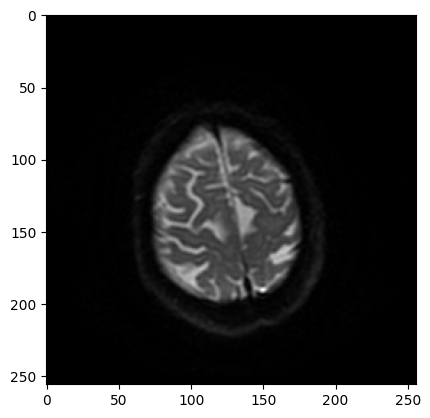

In [105]:
# посмотрим на эти снимки, в которых у нас больше слоёв
# есть 2 снимка в 3d
img_spec = nib.load(r'F:\!наука\stroke\Lesions\Lesions\Aterotromb\Kalinin_VM\dwi.nii.gz')
print(img_spec.shape)
#тут 3D картинка, но больше слоёв

plt.imshow(img_spec.get_fdata()[:, :, 44], cmap='gray')
plt.show()

In [112]:
aff_spec = img_spec.affine
print(aff_spec @ np.array([0, 0, 44, 1]))
print(img.affine @ np.array([0, 0, 22, 1]))

[-106.78213644   73.49716043  187.75067329    1.        ]
[-131.54288307  101.09857416   72.38418102    1.        ]


Видимо, изометрические центры для этих изображений совсем в другом месте... 
не впоне понятно, как их всех привести в одну систему и в какую именно систему?

Для того, чтобы поиграть с регрессором, уберём пока эти 2 картинки из выборки. 